In [7]:
# Importing pandas for numerical variable analysis and os, numpy, string, and nltk for text variable analysis.

import pandas as pd
import os as os
import numpy as np
import string as string
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
 

#nltk.download('stopwords')


In [8]:
bbSimple = pd.read_csv('bbNoText.csv')

In [9]:
# Split the data into training and testing sets with an 80/20 ratio
train_set, test_set = train_test_split(bbSimple, test_size=0.2, random_state=7)

# 'test_size' specifies the proportion of the dataset to include in the test split (0.2 means 20%)
# 'random_state' is used to ensure reproducibility, you can set it to any integer value for consistency

# You can now use 'train_set' and 'test_set' for your machine learning tasks


In [10]:
# Assuming 'target_column' is the name of the column you want to predict
X_train = train_set.drop(columns=['econ_index_dummy'])
y_train = train_set['econ_index_dummy']

X_test = test_set.drop(columns=['econ_index_dummy'])
y_test = test_set['econ_index_dummy']


In [11]:
X_train = X_train[['mean_sentiment', 'IQR_sentiment', 'median_sentiment', 'compound_score', 'sentiment_trigram']]
X_test = X_test[['mean_sentiment', 'IQR_sentiment', 'median_sentiment', 'compound_score', 'sentiment_trigram']]


## 3. Model Selection and Training

In [12]:
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression

# Create a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=7)  # You can adjust hyperparameters as needed

In [13]:
# Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=7)

In [14]:
# Make predictions on the test data
predictions = model.predict(X_test)


In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# For 80/20 test/train split
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)


In [16]:
print("Accuracy:", accuracy)
print("F1:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.5806831566548881
F1: 0.6468253968253969
Recall: 0.7056277056277056
Precision: 0.5970695970695971


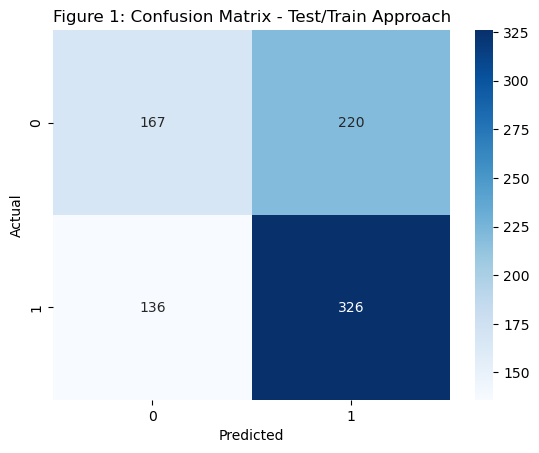

In [17]:
import seaborn as sns
conf_matrix_test_train = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix_test_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Figure 1: Confusion Matrix - Test/Train Approach")
#plt.savefig("confusion_matrix_testtrain.png")
plt.show()


In [18]:
TruePositive = 326
TrueNegative = 167
FalsePositive = 220
FalseNegative = 136

Precision = TruePositive / (TruePositive + FalsePositive)
Recall = TruePositive / (TruePositive + FalseNegative)
Sensitivity = Recall
Specificity = TrueNegative / (TrueNegative + FalsePositive)

print("Sensitivity:", Sensitivity)
print("Specificity:", Specificity)

Sensitivity: 0.7056277056277056
Specificity: 0.4315245478036176


### 4.2 - 5-fold cross validation

In [19]:
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression
from sklearn.model_selection import cross_val_predict, KFold

In [20]:
# Preparing data
X = bbSimple[['mean_sentiment', 'median_sentiment', 'IQR_sentiment', 'compound_score', 'sentiment_trigram']]  # Specify your features here
y = bbSimple['econ_index_dummy']


In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=7)  # You can adjust hyperparameters as needed


In [22]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Create a 5-fold cross-validation split

# Perform cross-validation and get predictions
predictions = cross_val_predict(model, X, y, cv=kf)


## 5. Model Evaluation

In [23]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score  # Use appropriate metrics for your problem

accuracy = accuracy_score(y, predictions)
f1 = f1_score(y, predictions)
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)


In [24]:
print("Accuracy:", accuracy)
print("F1:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.574964639321075
F1: 0.6286302780638516
Precision: 0.6053153510511702
Recall: 0.6538131962296486


In [25]:
from sklearn.metrics import classification_report  # Use appropriate metrics for your problem

class_report = classification_report(y, predictions)
print(f'Classification Report:\n{class_report}')


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.48      0.50      1908
           1       0.61      0.65      0.63      2334

    accuracy                           0.57      4242
   macro avg       0.57      0.57      0.57      4242
weighted avg       0.57      0.57      0.57      4242



### 5.2 Cross-validation metric scores

In [26]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and obtain metric scores (e.g., accuracy)
cv_scores = cross_val_score(model, X, y, cv=5)  # cv=5 means 5-fold cross-validation

# Print the cross-validated metric scores
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-validated Accuracy Scores: [0.52650177 0.53710247 0.52830189 0.5625     0.53891509]
Mean Accuracy: 0.5386642442829521


## 6. Results Visualization

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [28]:
# Compute the Confusion Matrix:
conf_matrix_kfold = confusion_matrix(y, predictions)


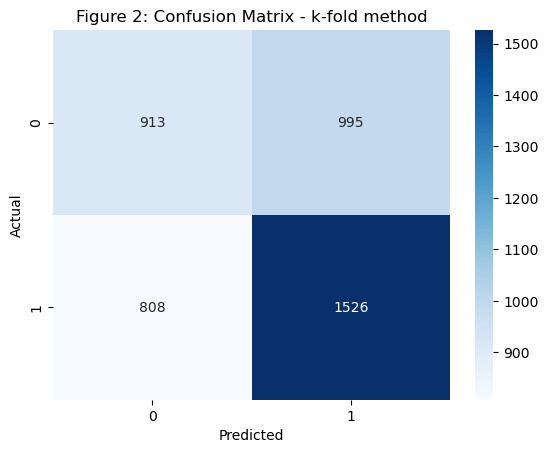

In [29]:
sns.heatmap(conf_matrix_kfold, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Figure 2: Confusion Matrix - k-fold method")
#plt.savefig("confusion_matrix_kfold.png")
plt.show()


In [30]:
TruePositiveCF = 1526
TrueNegativeCF = 913
FalsePositiveCF = 995
FalseNegativeCF = 808

PrecisionCF = TruePositiveCF / (TruePositiveCF + FalsePositiveCF)
RecallCF = TruePositiveCF / (TruePositiveCF + FalseNegativeCF)
SensitivityCF = RecallCF
SpecificityCF = TrueNegativeCF / (TrueNegativeCF + FalsePositiveCF)

print("Sensitivity:", SensitivityCF)
print("Specificity:", SpecificityCF)

Sensitivity: 0.6538131962296486
Specificity: 0.47851153039832284


### 6.2 - Feature importance plot
Want to show how much each predictor mattered.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold

In [32]:
# Previously defined 'X' and 'y' and 'kf' for 5-fold cross-validation
# Create an empty list to store feature importances for each fold
feature_importances_list = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Create and train a Random Forest model for this fold
    model = RandomForestClassifier(n_estimators=100, random_state=7)
    model.fit(X_train, y_train)
    
    # Retrieve and store feature importances for this fold
    feature_importances_list.append(model.feature_importances_)


In [33]:

# Calculate the mean feature importances across all folds
mean_feature_importances = np.mean(feature_importances_list, axis=0)

# Create a DataFrame with feature names and their mean importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': mean_feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [34]:
feature_importance_df.head()

,Feature,Importance
0,mean_sentiment,0.258075
4,sentiment_trigram,0.230194
2,IQR_sentiment,0.220552
3,compound_score,0.212382
1,median_sentiment,0.078796


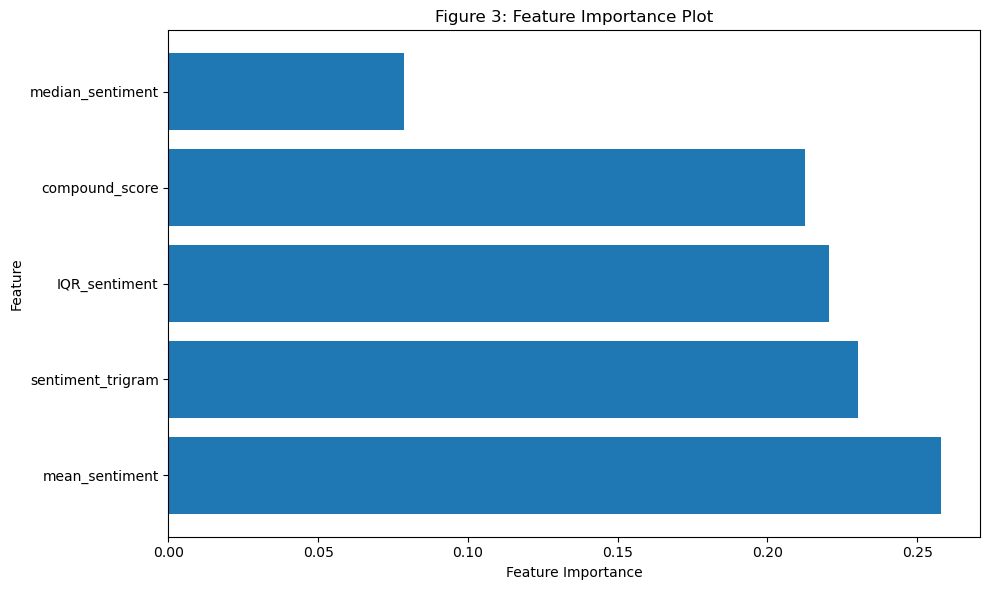

In [35]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a bar plot for feature importances
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

# Customize the plot
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Figure 3: Feature Importance Plot')
plt.tight_layout()
# Save the plot
#plt.savefig("feature_importance.png")

# Show the plot
plt.show()


## 7. Interpretation of Results

The model's accuracy is not good; it only correctly predicts whether the economic index is greater or worse than the national average 53.7% of the time. Those results are only marginally better than a guess.

However, I expected that with the limited number of variables. Mean sentiment is the most important predictor, followed by interquartile range of the sentiment. Median sentiment does not add much predictive power to the model.

My future plan is to improve the model's predictions by adding more predictor variables, namely related to the presence of key trigrams in the document.

